# 方差过滤

In [1]:
#1.导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
# 2.导入数据集，探索数据
data = pd.read_csv(r"C:\Users\ASUS\Desktop\EEG\feature_analysis\ours\S8\selected_s8.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean_0  1295 non-null   float64
 1   mean_1  1295 non-null   float64
 2   mean_2  1295 non-null   float64
 3   mean_3  1295 non-null   float64
 4   std_0   1295 non-null   float64
 5   std_1   1295 non-null   float64
 6   std_2   1295 non-null   float64
 7   std_3   1295 non-null   float64
 8   max_0   1295 non-null   float64
 9   max_1   1295 non-null   float64
 10  max_2   1295 non-null   float64
 11  max_3   1295 non-null   float64
 12  min_0   1295 non-null   float64
 13  min_1   1295 non-null   float64
 14  min_2   1295 non-null   float64
 15  min_3   1295 non-null   float64
 16  Label   1295 non-null   float64
dtypes: float64(17)
memory usage: 172.1 KB


In [3]:
data.shape

(1295, 17)

In [4]:
data.head()

mean_0  mean_1  mean_2    mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  2.1000  0.8620 -0.3080 -0.005240  102.0   62.5   41.1  37.10  210.0  171.0   
1  0.2510 -0.0801  0.2350  0.102000   25.5   17.8   13.4  10.30   59.2   46.9   
2 -0.7370 -0.2210  0.1970  0.000841   52.5   27.1   16.0  10.40  125.0   76.5   
3 -0.0527  0.1290 -0.0297 -0.010300   32.3   13.1   11.4   6.85   84.2   36.7   
4  1.2100  0.3570  0.0812  0.001940   50.3   23.0   13.4  16.00  167.0   60.6   

   max_2  max_3  min_0  min_1  min_2  min_3  Label  
0  128.0  121.0 -277.0 -159.0 -108.0 -117.0    0.0  
1   47.1   27.9  -59.9  -48.7  -42.6  -28.9    2.0  
2   47.5   25.0 -130.0  -68.6  -45.6  -25.8    1.0  
3   25.3   18.9 -102.0  -33.5  -24.1  -20.2    2.0  
4   37.4   52.4 -159.0  -60.6  -37.2  -43.0    0.0

In [5]:
data.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean      0.010296     0.006495    -0.001959    -0.000292    75.059923   
std       1.578398     0.588877     0.325103     0.108946    49.430489   
min      -9.610000    -2.320000    -1.630000    -0.640000    11.200000   
25%      -0.707000    -0.225000    -0.118500    -0.042850    40.400000   
50%       0.000142     0.006700    -0.001790    -0.000532    61.000000   
75%       0.737000     0.252000     0.132000     0.041150    93.600000   
max       8.580000     3.640000     1.230000     0.696000   361.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean     41.815367    28.259027    21.070965   194.825946   117.808571   
std      31.814699    22.078601    15.928615   126.133450    86.573125   
min       5.790000     4.590000     4.150000    22.700000    13.300000   
25%      18.700000    11.900000     8.990000   112.000000    54.000000   
50%      32.600000    22.200000    16.300000   158.000000    95.000000   
75%      54.800000    36.600000    27.350000   237.000000   154.000000   
max     187.000000   133.000000    95.700000   876.000000   497.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean     82.505019    62.513822  -195.640772  -116.997066   -82.697066   
std      62.235261    45.997701   124.152719    86.135462    61.857323   
min      12.800000    10.800000  -861.000000  -496.000000  -413.000000   
25%      33.700000    25.850000  -249.000000  -153.000000  -113.000000   
50%      67.600000    50.100000  -162.000000   -95.300000   -67.900000   
75%     113.000000    84.500000  -109.500000   -53.700000   -35.700000   
max     438.000000   241.000000   -21.800000   -13.100000   -12.000000   

             min_3        Label  
count  1295.000000  1295.000000  
mean    -62.569112     0.933591  
std      45.843331     0.818209  
min    -239.000000     0.000000  
25%     -84.800000     0.000000  
50%     -51.100000     1.000000  
75%     -26.200000     2.000000  
max     -10.600000     2.000000

In [6]:
from sklearn.preprocessing import LabelEncoder
y = data.iloc[:,-1]#要输入的是标签，不是特征矩阵，所以允许一维

In [7]:
le = LabelEncoder()  # 实例化
le = le.fit(y) # 导入数据
label = le.transform(y) # transform接口调取数据
le.classes_  #属性.classes_查看标签中究竟有多少类别
label

array([0, 2, 1, ..., 0, 1, 2], dtype=int64)

In [8]:
le.fit_transform(y)  #也可以直接fit_transform一步到位

array([0, 2, 1, ..., 0, 1, 2], dtype=int64)

In [9]:
le.inverse_transform(label)  #使用inverse_transform可以逆转

array([0., 2., 1., ..., 0., 1., 2.])

In [10]:
data.iloc[:,-1] = label  #让标签等于我们运行出来的结果
data.head()


mean_0  mean_1  mean_2    mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  2.1000  0.8620 -0.3080 -0.005240  102.0   62.5   41.1  37.10  210.0  171.0   
1  0.2510 -0.0801  0.2350  0.102000   25.5   17.8   13.4  10.30   59.2   46.9   
2 -0.7370 -0.2210  0.1970  0.000841   52.5   27.1   16.0  10.40  125.0   76.5   
3 -0.0527  0.1290 -0.0297 -0.010300   32.3   13.1   11.4   6.85   84.2   36.7   
4  1.2100  0.3570  0.0812  0.001940   50.3   23.0   13.4  16.00  167.0   60.6   

   max_2  max_3  min_0  min_1  min_2  min_3  Label  
0  128.0  121.0 -277.0 -159.0 -108.0 -117.0      0  
1   47.1   27.9  -59.9  -48.7  -42.6  -28.9      2  
2   47.5   25.0 -130.0  -68.6  -45.6  -25.8      1  
3   25.3   18.9 -102.0  -33.5  -24.1  -20.2      2  
4   37.4   52.4 -159.0  -60.6  -37.2  -43.0      0

In [11]:
print(data.columns)

Index(['mean_0', 'mean_1', 'mean_2', 'mean_3', 'std_0', 'std_1', 'std_2',
       'std_3', 'max_0', 'max_1', 'max_2', 'max_3', 'min_0', 'min_1', 'min_2',
       'min_3', 'Label'],
      dtype='object')


In [12]:
data['Label']

0       0
1       2
2       1
3       2
4       0
       ..
1290    2
1291    0
1292    0
1293    1
1294    2
Name: Label, Length: 1295, dtype: int64

In [13]:
data.shape

(1295, 17)

In [14]:
x = data.iloc[:,0:16]
x.head()

mean_0  mean_1  mean_2    mean_3  std_0  std_1  std_2  std_3  max_0  max_1  \
0  2.1000  0.8620 -0.3080 -0.005240  102.0   62.5   41.1  37.10  210.0  171.0   
1  0.2510 -0.0801  0.2350  0.102000   25.5   17.8   13.4  10.30   59.2   46.9   
2 -0.7370 -0.2210  0.1970  0.000841   52.5   27.1   16.0  10.40  125.0   76.5   
3 -0.0527  0.1290 -0.0297 -0.010300   32.3   13.1   11.4   6.85   84.2   36.7   
4  1.2100  0.3570  0.0812  0.001940   50.3   23.0   13.4  16.00  167.0   60.6   

   max_2  max_3  min_0  min_1  min_2  min_3  
0  128.0  121.0 -277.0 -159.0 -108.0 -117.0  
1   47.1   27.9  -59.9  -48.7  -42.6  -28.9  
2   47.5   25.0 -130.0  -68.6  -45.6  -25.8  
3   25.3   18.9 -102.0  -33.5  -24.1  -20.2  
4   37.4   52.4 -159.0  -60.6  -37.2  -43.0

In [15]:
x.describe()

mean_0       mean_1       mean_2       mean_3        std_0  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean      0.010296     0.006495    -0.001959    -0.000292    75.059923   
std       1.578398     0.588877     0.325103     0.108946    49.430489   
min      -9.610000    -2.320000    -1.630000    -0.640000    11.200000   
25%      -0.707000    -0.225000    -0.118500    -0.042850    40.400000   
50%       0.000142     0.006700    -0.001790    -0.000532    61.000000   
75%       0.737000     0.252000     0.132000     0.041150    93.600000   
max       8.580000     3.640000     1.230000     0.696000   361.000000   

             std_1        std_2        std_3        max_0        max_1  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean     41.815367    28.259027    21.070965   194.825946   117.808571   
std      31.814699    22.078601    15.928615   126.133450    86.573125   
min       5.790000     4.590000     4.150000    22.700000    13.300000   
25%      18.700000    11.900000     8.990000   112.000000    54.000000   
50%      32.600000    22.200000    16.300000   158.000000    95.000000   
75%      54.800000    36.600000    27.350000   237.000000   154.000000   
max     187.000000   133.000000    95.700000   876.000000   497.000000   

             max_2        max_3        min_0        min_1        min_2  \
count  1295.000000  1295.000000  1295.000000  1295.000000  1295.000000   
mean     82.505019    62.513822  -195.640772  -116.997066   -82.697066   
std      62.235261    45.997701   124.152719    86.135462    61.857323   
min      12.800000    10.800000  -861.000000  -496.000000  -413.000000   
25%      33.700000    25.850000  -249.000000  -153.000000  -113.000000   
50%      67.600000    50.100000  -162.000000   -95.300000   -67.900000   
75%     113.000000    84.500000  -109.500000   -53.700000   -35.700000   
max     438.000000   241.000000   -21.800000   -13.100000   -12.000000   

             min_3  
count  1295.000000  
mean    -62.569112  
std      45.843331  
min    -239.000000  
25%     -84.800000  
50%     -51.100000  
75%     -26.200000  
max     -10.600000

In [16]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.2)
print(Xtrain.shape,Xtest.shape,Ytrain.shape,Ytest.shape)

(1036, 16) (259, 16) (1036,) (259,)


KNeighborsClassifier
****Results****
Accuracy: 64.8649%
Log Loss: 3.815124786642745
SVC
****Results****
Accuracy: 44.4015%
Log Loss: 1.0740984326486733
NuSVC
****Results****
Accuracy: 62.1622%
Log Loss: 0.9450251657319773
RandomForestClassifier
****Results****
Accuracy: 87.6448%
Log Loss: 0.4304551662003362
ExtraTreesClassifier
****Results****
Accuracy: 87.6448%
Log Loss: 0.21985275947184033
LGBMClassifier
****Results****
Accuracy: 86.8726%
Log Loss: 0.33612040972903096
LinearDiscriminantAnalysis
****Results****
Accuracy: 46.7181%
Log Loss: 1.0688688020507617
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 42.4710%
Log Loss: 1.4600749387353376


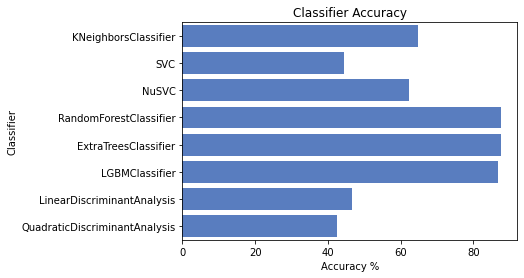

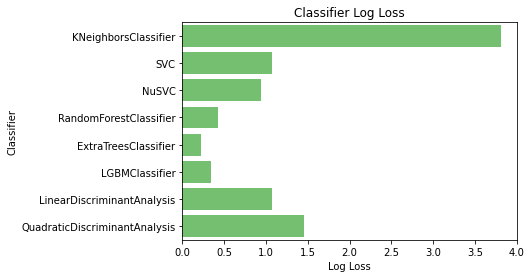

In [17]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier  # k近邻算法
from sklearn.svm import SVC, LinearSVC, NuSVC   #支持向量机分类器、线性支持向量机分类器、核支持向量分类
from sklearn.tree import DecisionTreeClassifier   # 决策树
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier   # 随机森林、极端随机森林、AdaBoost、GradientBoost
from sklearn.naive_bayes import GaussianNB    #朴素贝叶斯GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis   #线性判别分析
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   #二次判别分析
import pandas as pd
import lightgbm 
from lightgbm import LGBMClassifier
import seaborn as sns

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="rbf",probability=True),
    NuSVC(probability=True),
#     DecisionTreeClassifier(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    LGBMClassifier(),
#     AdaBoostClassifier(),
#     GradientBoostingClassifier(),
#     GaussianNB(),
    LinearDiscriminantAnalysis(solver='svd'),
    QuadraticDiscriminantAnalysis()]

# 结果可视化
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(Xtrain, Ytrain)
    name = clf.__class__.__name__

    print("="*30)
    print(name)

    print('****Results****')
    train_predictions = clf.predict(Xtest)
    acc = accuracy_score(Ytest, train_predictions)
    print("Accuracy: {:.4%}".format(acc))

    train_predictions = clf.predict_proba(Xtest)
    ll = log_loss(Ytest, train_predictions)
    print("Log Loss: {}".format(ll))

    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)

print("="*30)
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

In [18]:
import os
from numpy import loadtxt
import xgboost as xgb
from numpy import sort
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import datasets
from xgboost import plot_importance
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectFromModel
import warnings
from matplotlib import  pyplot
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
warnings.filterwarnings("ignore")
# 加载数据集

CV accuracy scores:[0.75961538 0.79807692 0.77884615 0.82692308 0.79807692 0.75961538
 0.86407767 0.86407767 0.84466019 0.78640777]
Accuracy for XGBoost Classifier :  0.808037714712472
[0.05484332 0.05429599 0.05077302 0.05758342 0.07838491 0.05796023
 0.06059812 0.07339308 0.05880528 0.0474872  0.06506262 0.07316925
 0.07063    0.05688518 0.06682339 0.07330498]


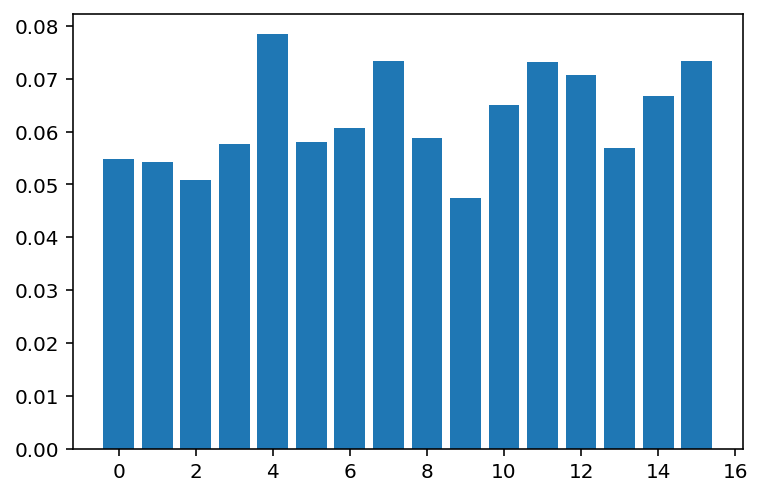

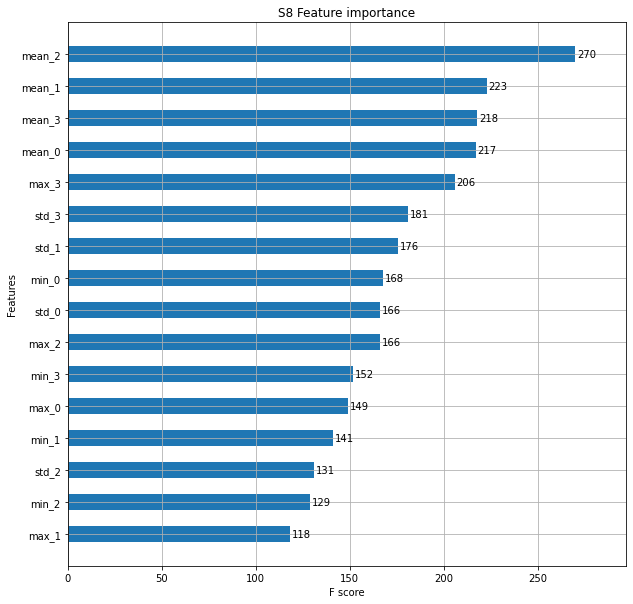

Accuracy: 84.17%
[0.0474872  0.05077302 0.05429599 0.05484332 0.05688518 0.05758342
 0.05796023 0.05880528 0.06059812 0.06506262 0.06682339 0.07063
 0.07316925 0.07330498 0.07339308 0.07838491]
Thresh=0.047, n=16, Accuracy: 87.64%
Thresh=0.051, n=15, Accuracy: 88.42%
Thresh=0.054, n=14, Accuracy: 86.87%
Thresh=0.055, n=13, Accuracy: 86.87%
Thresh=0.057, n=12, Accuracy: 87.64%
Thresh=0.058, n=11, Accuracy: 87.64%
Thresh=0.058, n=10, Accuracy: 86.10%
Thresh=0.059, n=9, Accuracy: 86.87%
Thresh=0.061, n=8, Accuracy: 86.10%
Thresh=0.065, n=7, Accuracy: 87.64%
Thresh=0.067, n=6, Accuracy: 87.64%
Thresh=0.071, n=5, Accuracy: 86.10%
Thresh=0.073, n=4, Accuracy: 85.33%
Thresh=0.073, n=3, Accuracy: 86.10%
Thresh=0.073, n=2, Accuracy: 84.56%
Thresh=0.078, n=1, Accuracy: 55.98%
[0.8764478764478765, 0.8841698841698842, 0.8687258687258688, 0.8687258687258688, 0.8764478764478765, 0.8764478764478765, 0.861003861003861, 0.8687258687258688, 0.861003861003861, 0.8764478764478765, 0.8764478764478765, 0.86

In [19]:
          #数据预处理---scale标准化

model=XGBClassifier(objective='multi:softmax',
                                                       n_estimators=150,  # 迭代次数
                                                       learning_rate=0.2,  # 步长
                                                       max_depth=3,  # 树的最大深度
                                                       min_child_weight=1,  # 决定最小叶子节点样本权重和
                                                    
                                                      subsample=0.8,  # 每个决策树所用的子样本占总样本的比例（作用于样本）
                                                       colsample_bytree=0.8, 

                                                     )

#model = XGBClassifier()
model.fit(Xtrain, Ytrain)




scores = cross_val_score(model, Xtrain, Ytrain, cv=10)
print("CV accuracy scores:%s" % scores)
print('Accuracy for XGBoost Classifier : ', scores.mean())
# 变量重要性列表
print(model.feature_importances_)

# 变量重要性可视化

plt.figure(figsize=(6,4), dpi=144)
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)


# 变量重要性排序可视化

 
fig,ax = plt.subplots(figsize=(10,10))
plot_importance(model,
                height=0.5,
                ax=ax,
                 title='S8 Feature importance',
                max_num_features=64)
plt.show()


# make predictions for test data and evaluate
y_pred = model.predict(Xtest)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(Ytest, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


#plot_importance(pl_xgb)
thresholds = sort(model.feature_importances_)
print(thresholds)


acc = []
for thresh in thresholds: # 遍历所有的特征重要性得分，把每个得分作为阈值进行特征选择
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_Xtrain = selection.transform(Xtrain)
# train model
    selection_model = XGBClassifier()
    selection_model.fit(select_Xtrain, Ytrain)
# eval model
    select_Xtest = selection.transform(Xtest)
    y_pred = selection_model.predict(select_Xtest)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(Ytest, predictions)
    
   
    acc.append(accuracy)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_Xtrain.shape[1], accuracy*100.0))

print(acc)
    

In [20]:
from sklearn.manifold import TSNE
import time
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


time_start = time.time()

fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

print(f't-SNE done! Time elapsed: {time.time()-time_start} seconds')



t-SNE done! Time elapsed: 2.806797742843628 seconds


In [21]:
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

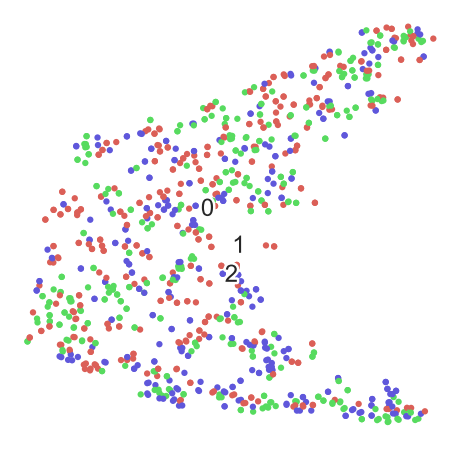

In [22]:
fashion_tsne = TSNE(random_state=RS, n_jobs=-1).fit_transform(Xtrain)

f, ax, sc, txts = fashion_scatter(fashion_tsne, Ytrain)
f.show()

# ---------------------------分割线-----------------------------

# Embedded嵌入法

In [23]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC

In [24]:
RFC_ = RFC(n_estimators=10,random_state=0)  # 随机森林实例化

In [25]:
x = data_.iloc[:,:-2]
y = data_.iloc[:,-1]
x.shape

NameError: name 'data_' is not defined

* 阈值为0.005

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.005).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape
#模型的维度明显被降低了
#同样的，我们也可以画学习曲线来找最佳阈值

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.00870999).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
# 确定准确率最高threshold值


score2 = []
for i in np.linspace(0,0.00870999,20):
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y)
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()
    score2.append(once)
plt.figure(figsize=[20,5])
plt.plot(np.linspace(0,0.00870999,20),score2)
plt.xticks(np.linspace(0,0.00870999,20))
plt.show()

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.003209).fit_transform(x,y)

In [ ]:
x_embedded.shape

In [ ]:
cross_val_score(RFC_,x_embedded,y,cv=5).mean()

In [ ]:
cross_val_score(RFC(n_estimators=100,random_state=0),x_embedded,y,cv=5).mean()

* 阈值为0.001

In [ ]:
x_embedded = SelectFromModel(RFC_,threshold=0.001).fit_transform(x,y)
#在这里我只想取出来有限的特征。0.005这个阈值对于有780个特征的数据来说，是非常高的阈值，因为平均每个特征
# 只能够分到大约0.001的feature_importances_

In [ ]:
x_embedded.shape

In [ ]:
RFC_.fit(x,y).feature_importances_

In [ ]:
(RFC_.fit(x,y).feature_importances_).max()

In [ ]:
# 绘制学习曲线
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
RFC_.fit(x,y).feature_importances_
threshold = np.linspace(0,(RFC_.fit(x,y).feature_importances_).max(),20)
#0 - feature_importances_ 范围中取20个数

score = []
for i in threshold:
    x_embedded = SelectFromModel(RFC_,threshold=i).fit_transform(x,y) # 随机森林实例化
    once = cross_val_score(RFC_,x_embedded,y,cv=5).mean()  # 交叉验证5次
    score.append(once)
plt.plot(threshold,score)
plt.show()

In [ ]:
threshold

# Wrapper包装法

In [ ]:
from sklearn.feature_selection import RFE
RFC_ = RFC(n_estimators=10,random_state=0)
selector = RFE(RFC_,n_features_to_select=22,step=5).fit(x,y)  # 每迭代一次删除掉50个特征

In [ ]:
selector.support_.sum() #.support_：返回所有的特征的是否最后被选中的布尔矩阵

In [ ]:
selector.ranking_   #返回特征的按数次迭代中综合重要性的排名,越重要的特征排在前面

In [ ]:
x_wrapper = selector.transform(x)

In [ ]:
cross_val_score(RFC_,x_wrapper,y,cv=5).mean()

In [ ]:
# 绘制学习曲线
score = []
for i in range(1,751,50):
    x_wrapper = RFE(RFC_,n_features_to_select=i, step=50).fit_transform(x,y)
    once = cross_val_score(RFC_,x_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,751,50),score)
plt.xticks(range(1,751,50))
plt.show()